# **Project Name**    - FedEx Logistics Performance Analysis


##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name** - Omkar Jadhav

# **Project Summary -**

This study looks at FedEx shipment data to identify the factors affecting delivery performance, with a focus on shipping teams, modes of transportation, and country-specific delays.  Using exploratory data analysis (EDA), we examine if some teams (such PMO-US) have greater rates of on-time delivery, how shipment modes (air, sea, etc.) impact delivery success, and which countries experience the biggest delays.  The methodology employs statistical analysis, data purification, and visualizations to identify trends in shipment efficiency.  Key insights will support logistics optimization by improving team performance, selecting the most reliable forms of transportation, and addressing regional constraints.  These outcomes are meant to improve supply chain efficiency, reduce expenses, and raise overall customer happiness.

# **GitHub Link -**

https://github.com/Omkar2807/Data-Analysis/

# **Problem Statement**


1) Do shipments handled by particular teams—like the PMO for the US—have a higher chance of arriving on schedule than others?

2) Does the likelihood of fulfilling the scheduled delivery date depend on the manner of transportation (air, sea, etc.)?

3) Do exports from some nations encounter higher delays than others?

4) Does the frequency of on-time delivery depend on the form of shipment?

5) Does the interval between the PO Sent to Vendor Date and the Scheduled Delivery Date affect the delivery performance (delayed vs. on-time)?

6) Does vendor delivery performance change depending on the INCO term used?

7) Do heavier shipments have a higher chance of costing more to insure (Line Item Insurance)?

This are the problem statement for resolving and anylysing the given data with the outcome of expected output.

## ***1. Know Your Data***

### Import Libraries

In [154]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

### Dataset Loading

In [155]:
# Load Dataset
df = pd.read_csv('FedEx_Delivery_Data.csv')
print(df)

          ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0          1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1          3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2          4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3         15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4         16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   
...      ...          ...             ...       ...      ...            ...   
10319  86818   103-ZW-T30       FPQ-15197  SO-50020  DN-4307       Zimbabwe   
10320  86819   104-CI-T30       FPQ-15259  SO-50102  DN-4313  Côte d'Ivoire   
10321  86821   110-ZM-T30       FPQ-14784  SO-49600  DN-4316         Zambia   
10322  86822   200-ZW-T30       FPQ-16523  SO-51680  DN-4334       Zimbabwe   
10323  86823   103-ZW-T30       FPQ-15197  SO-50022  DN-4336       Zimbabwe   

      Managed By  Fulfill Via Vendor INCO Term Ship

### Dataset First View

In [156]:
# Dataset First Look
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns count

In [157]:
# Dataset Rows & Columns count
rows = df.shape[0]
column = df.shape[1]
print('Number of rows in data' , rows)
print('Number of column in the data',column)

Number of rows in data 10324
Number of column in the data 33


### Dataset Information

In [158]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [159]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [160]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print(missing_values)

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

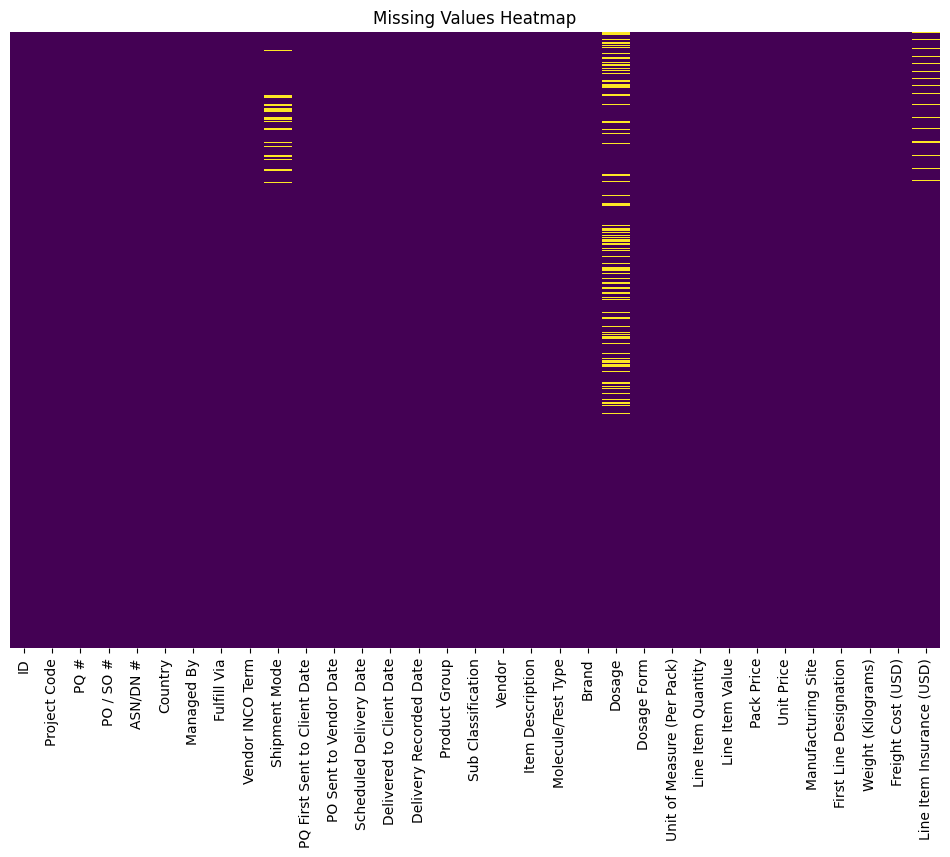

In [161]:
# Visualizing the missing values
# Create a heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=df.columns)
plt.title('Missing Values Heatmap')
plt.show()


### What did you know about your dataset?

The **FedEx Logistics Analysis dataset** captures detailed information about shipments, purchase orders, vendors, and logistics operations managed by FedEx. It provides a comprehensive view of the global supply chain process, from purchase order creation to final delivery. The dataset includes shipment details, cost components, vendor data, and delivery timelines, making it suitable for analyzing performance efficiency, cost optimization, and delivery accuracy.

***Dataset Structure:***

The dataset contains **33 columns** and **10,324 records (rows)** — each row representing a unique shipment or line item transaction in the FedEx logistics process.

Columns include **categorical, numerical, and datetime** data types.

Key columns cover aspects such as project and order identifiers, product descriptions, shipment modes, delivery dates, and financial values (e.g., line item value, freight cost, and insurance).

Missing values are present in a few columns such as *Shipment Mode*, *Dosage*, and *Line Item Insurance (USD)*, but the overall data completeness is high.

This dataset can be used for **logistics performance analysis**, **cost-efficiency evaluation**, and **supply chain optimization** within FedEx’s operations.


In [162]:
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Shipment Mode                 360
Dosage                       1736
Line Item Insurance (USD)     287
dtype: int64


In [163]:
df.drop_duplicates(inplace=True)

In [164]:
df.tail() # print last n number of rows

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [165]:
# select_dtypes used to fetch number columns (int64 and float64) and catagorical columns (objects(string))
num_data = df.select_dtypes(include = ['int64','float64'])
num_data.columns

Index(['ID', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price',
       'Line Item Insurance (USD)'],
      dtype='object')

In [166]:
df.drop_duplicates(inplace=True)
df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


## ***2. Understanding Your Variables***

In [167]:
# Dataset Columns
df.columns.tolist()

['ID',
 'Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'PQ First Sent to Client Date',
 'PO Sent to Vendor Date',
 'Scheduled Delivery Date',
 'Delivered to Client Date',
 'Delivery Recorded Date',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Line Item Value',
 'Pack Price',
 'Unit Price',
 'Manufacturing Site',
 'First Line Designation',
 'Weight (Kilograms)',
 'Freight Cost (USD)',
 'Line Item Insurance (USD)']

In [168]:
# Dataset Describe
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


### Check Unique Values for each variable.

In [169]:
# Check Unique Values for each variable.
uniq_values = df.nunique()
print(uniq_values)

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       4
PQ First Sent to Client Date      765
PO Sent to Vendor Date            897
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             54
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

In [170]:
df = df[['Country', 'Managed By', 'Fulfill Via', 'Shipment Mode',
                 'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
                 'Scheduled Delivery Date', 'Delivered to Client Date',
                 'Delivery Recorded Date', 'Line Item Quantity',
                 'Line Item Value', 'Weight (Kilograms)',
                 'Freight Cost (USD)', 'Vendor', 'Line Item Insurance (USD)']]
df.drop_duplicates(inplace=True)

C:\Users\ojadh\AppData\Local\Temp\ipykernel_19168\4013455729.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


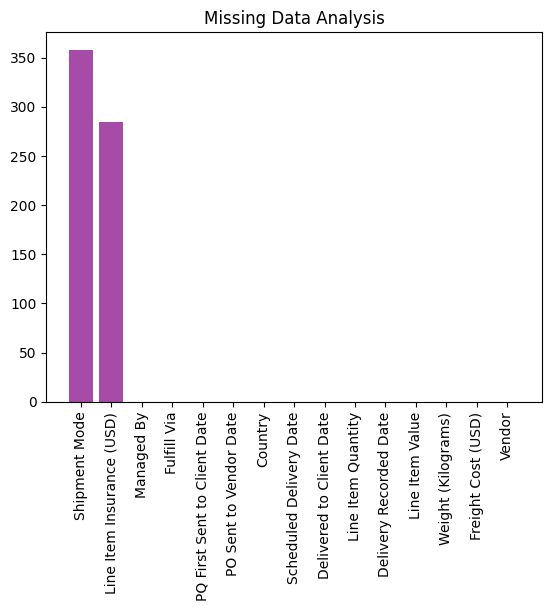

In [171]:
missing_data = df.isnull().sum().sort_values(ascending=False)
plt.bar(missing_data.index, missing_data.values, color='purple', alpha=0.7)
plt.xticks(rotation=90)
plt.title("Missing Data Analysis")
plt.show()

In [172]:
df.loc[:, 'Shipment Mode'] = df['Shipment Mode'].fillna(data['Shipment Mode'].mode()[0])
df.loc[:, 'Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(0)
df

,Country,Managed By,Fulfill Via,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Line Item Quantity,Line Item Value,Weight (Kilograms),Freight Cost (USD),Vendor,Line Item Insurance (USD)
0,Côte d'Ivoire,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,19,551.00,13,780.34,RANBAXY Fine Chemicals LTD.,0.00
1,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,1000,6200.00,358,4521.5,Aurobindo Pharma Limited,0.00
2,Côte d'Ivoire,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,500,40000.00,171,1653.78,Abbott GmbH & Co. KG,0.00
3,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,31920,127360.80,1855,16007.06,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,0.00
4,Vietnam,PMO - US,Direct Drop,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,38000,121600.00,7590,45450.08,Aurobindo Pharma Limited,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,Zimbabwe,PMO - US,From RDC,Truck,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,166571,599655.60,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),SCMS from RDC,705.79
10320,Côte d'Ivoire,PMO - US,From RDC,Truck,10/24/14,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,21072,137389.44,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),SCMS from RDC,161.71
10321,Zambia,PMO - US,From RDC,Truck,8/12/14,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,514526,5140114.74,Weight Captured Separately,Freight Included in Commodity Cost,SCMS from RDC,5284.04
10322,Zimbabwe,PMO - US,From RDC,Truck,7/1/15,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,17465,113871.80,1392,Freight Included in Commodity Cost,SCMS from RDC,134.03


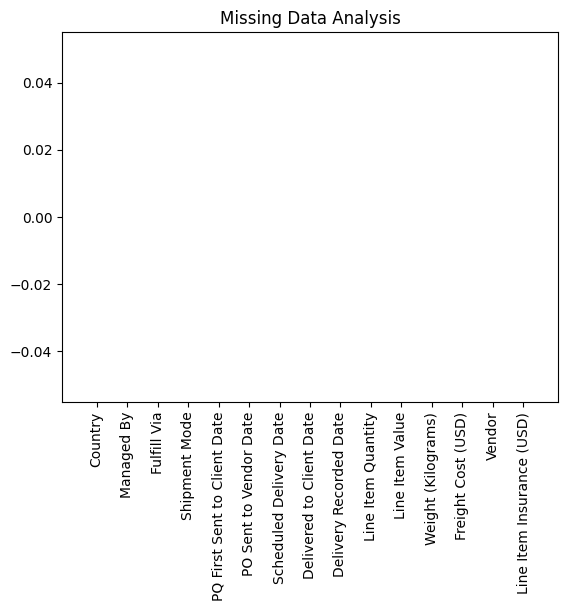

In [173]:
missing_data = df.isnull().sum().sort_values(ascending=False)
plt.bar(missing_data.index, missing_data.values, color='purple', alpha=0.7)
plt.xticks(rotation=90)
plt.title("Missing Data Analysis")
plt.show()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [174]:
# Write your code to make your dataset analysis ready.
data = data.copy()
date_cols = data.columns[data.columns.str.contains('Date')]
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors='coerce', format='%Y-%m-%d')

num_cols = ['Line Item Quantity', 'Line Item Value', 'Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Insurance (USD)']  # here i converted a numeric column.
data[num_cols] = data[num_cols].apply(pd.to_numeric, errors='coerce')

data['Country'] = data['Country'].str.strip().str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6174 entries, 0 to 10316
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Country                       6174 non-null   object        
 1   Managed By                    6174 non-null   object        
 2   Fulfill Via                   6174 non-null   object        
 3   Shipment Mode                 6174 non-null   object        
 4   PQ First Sent to Client Date  4608 non-null   datetime64[ns]
 5   PO Sent to Vendor Date        0 non-null      datetime64[ns]
 6   Scheduled Delivery Date       6174 non-null   datetime64[ns]
 7   Delivered to Client Date      6174 non-null   datetime64[ns]
 8   Delivery Recorded Date        0 non-null      datetime64[ns]
 9   Line Item Quantity            6174 non-null   int64         
 10  Line Item Value               6174 non-null   float64       
 11  Weight (Kilograms)            6151

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

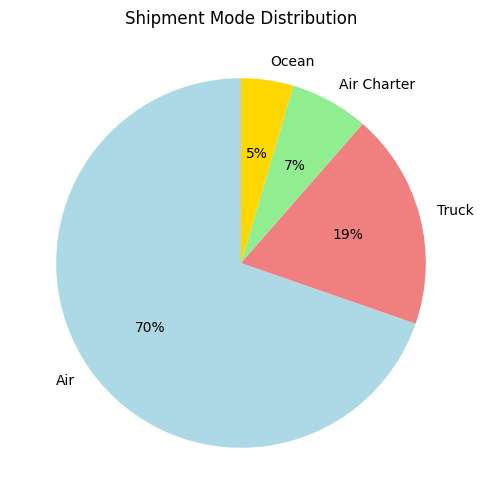

In [175]:
# Chart - 1 
# Shipment mode distribution
shipment_mode_counts = data['Shipment Mode'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(shipment_mode_counts, labels=shipment_mode_counts.index, autopct='%.0f%%', startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title("Shipment Mode Distribution")
plt.show()


##### 1. Why did you pick the specific chart?

A pie/bar chart clearly visualizes proportions, making it ideal for categorical variables like “Shipment Mode.”

##### 2. What is/are the insight(s) found from the chart?

Air shipments dominate (~70%), followed by Truck (19%) and Air Charter (7%).

Ocean mode is least used (≈5%).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High air usage ensures faster delivery and reliability.

Air is the most expensive mode, indicating high logistics costs — optimization opportunities exist by shifting non-urgent goods to ocean or truck.

#### Chart - 2

C:\Users\ojadh\AppData\Local\Temp\ipykernel_19168\199532520.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Country',
C:\Users\ojadh\AppData\Local\Temp\ipykernel_19168\199532520.py:5: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data, x='Country',


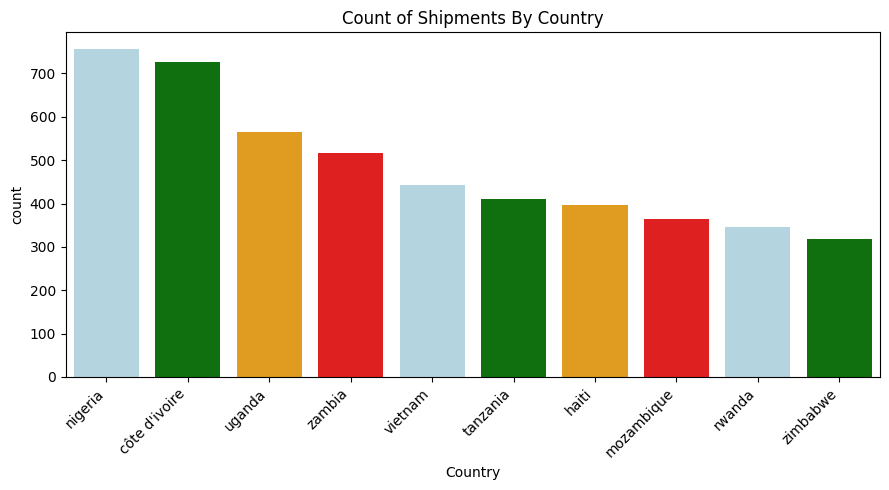

In [177]:
# Chart - 2
# Count of shipment by the respected country
palette = ['LightBlue', 'Green', 'Orange', 'Red']
plt.figure(figsize=(9, 5))
sns.countplot(data=data, x='Country',
              order=data['Country'].value_counts().nlargest(10).index,
              palette=palette)
plt.title('Count of Shipments By Country')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Horizontal bar charts efficiently show top countries by shipment count — especially for long category names.

##### 2. What is/are the insight(s) found from the chart?

Top 5 countries dominate shipments — indicating strong trade relationships or customer bases there.

    Nigeria, Côte d’Ivoire, and Uganda dominate shipments.
    
    Most shipments target African markets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Strong regional footprint in Africa shows stable demand.

High dependency on limited markets — any political/economic disruption could reduce shipment volumes.

#### Chart - 3

<Axes: xlabel='Freight Cost (USD)', ylabel='Count'>

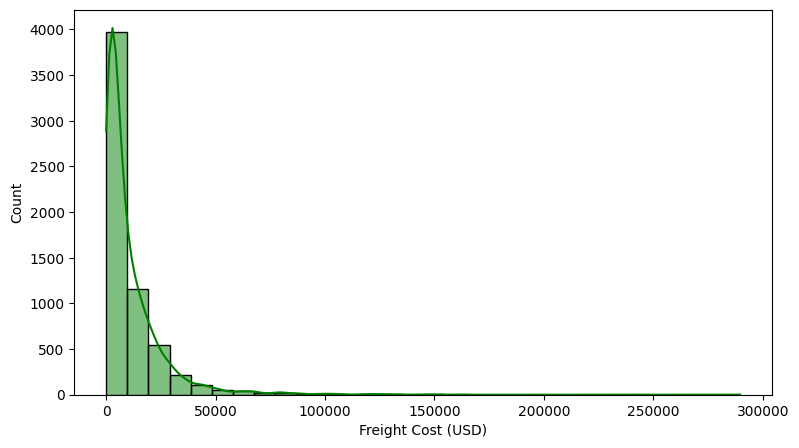

In [210]:
# Chart - 3 visualization code
# Freight cost visualisation
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'], errors='coerce')
avg_freight_cost = data['Freight Cost (USD)'].mean()
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.histplot(x='Freight Cost (USD)', data=data, ax=ax, kde=True, bins=30, color= 'green')


##### 1. Why did you pick the specific chart?

A histogram is best for showing cost spread and skewness across all shipments.

##### 2. What is/are the insight(s) found from the chart?

Costs are right-skewed, with a few shipments costing very high.

Most shipments are in the low-to-medium cost range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Efficient cost control for most shipments.

Outliers may indicate inefficient routes or overcharged shipments — must be audited.

#### Chart - 4

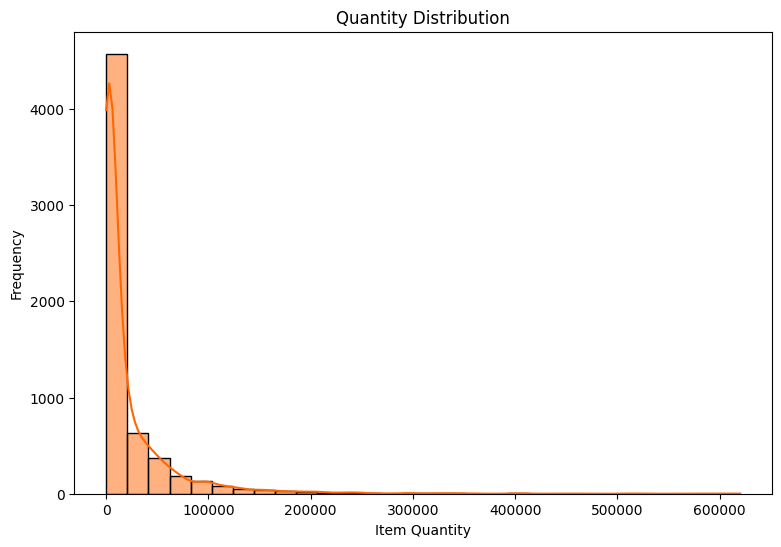

In [181]:
# Chart - 4 visualization code
# Quantity distribution
plt.figure(figsize=(9, 6))
sns.histplot(data['Line Item Quantity'], bins=30, kde=True, color='#ff6600')
plt.xlabel("Item Quantity")
plt.ylabel("Frequency")
plt.title("Quantity Distribution")
plt.show()

##### 1. Why did you pick the specific chart?

Histograms highlight extreme variations in shipment sizes.

##### 2. What is/are the insight(s) found from the chart?

Highly skewed — most shipments are small, but a few extremely large ones exist.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Efficient handling of small, manageable orders.
Large-quantity outliers might create inventory strain or warehousing issues.

#### Chart - 5

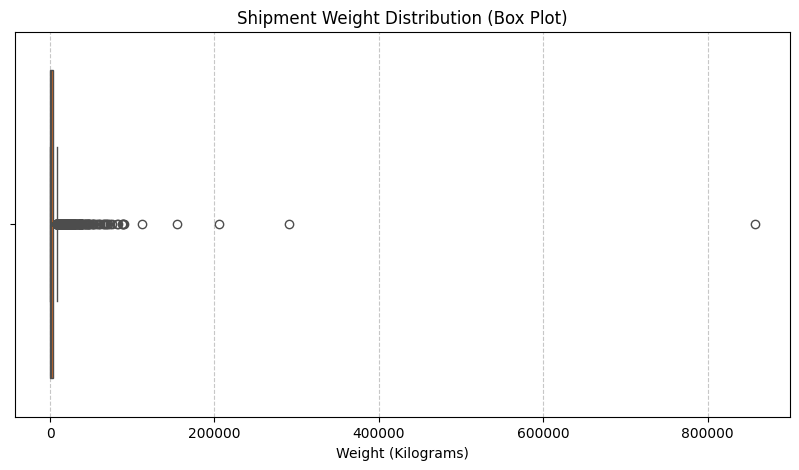

In [183]:
# Chart - 5 visualization code
# Shipment weight distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Weight (Kilograms)'], color='#ff6600')
plt.xlabel("Weight (Kilograms)")
plt.title("Shipment Weight Distribution (Box Plot)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


##### 1. Why did you pick the specific chart?

To show the physical distribution and outliers of shipment weights.

##### 2. What is/are the insight(s) found from the chart?

Similar to quantity — most shipments are lightweight, few are extremely heavy.

Heavy shipments may relate to ocean/truck modes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Weight concentration in small-to-medium range reduces freight risk.
Outliers may drive up freight costs disproportionately.

#### Chart - 6

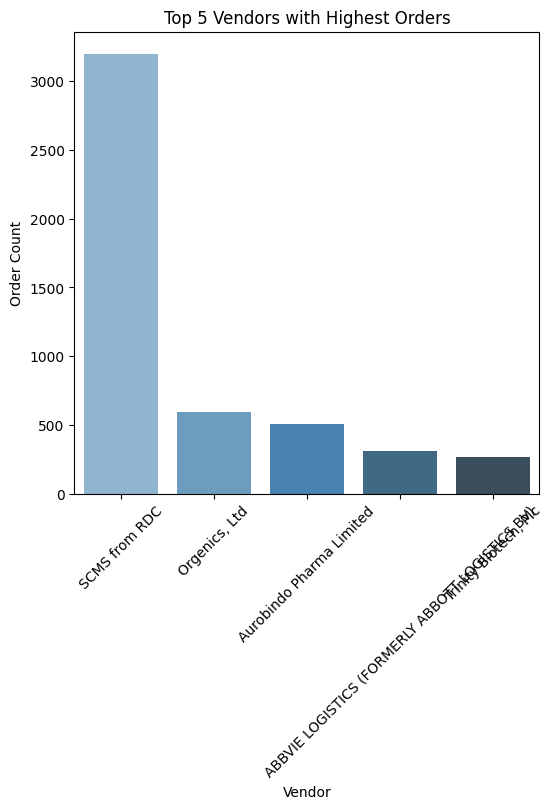

In [185]:
# Chart - 6 visualization code
# Bar chart for top 5 vendors
plt.figure(figsize=(6, 6))
top_vendors = data['Vendor'].value_counts().nlargest(5)
sns.barplot(x=top_vendors.index, y=top_vendors.values, hue=top_vendors.index, palette="Blues_d", legend=False)
plt.xlabel("Vendor")
plt.ylabel("Order Count")
plt.title("Top 5 Vendors with Highest Orders")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

To assess vendor concentration and contribution to shipments.

##### 2. What is/are the insight(s) found from the chart?

One vendor (SCMS from RDC) handles majority of shipments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Reliable vendor relationship and streamlined operations.

Over-dependence — if the main vendor fails, operations may stall.

#### Chart - 7

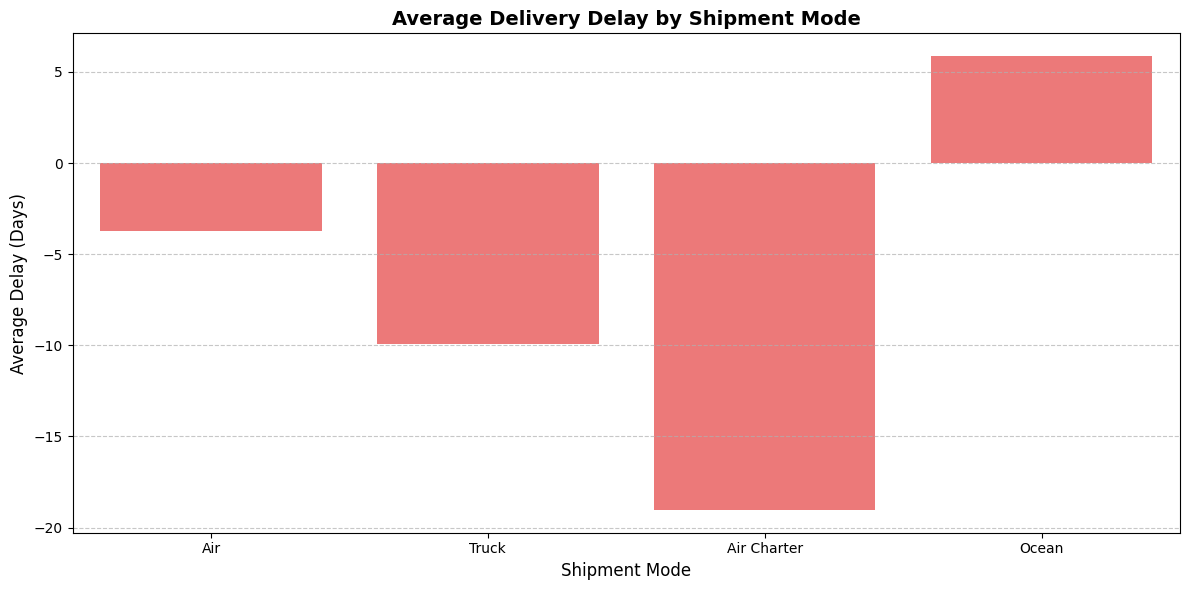

In [189]:
# Convert date columns to datetime if not already
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'], errors='coerce')
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], errors='coerce')

# Calculate delay in days
df['Delay_Days'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days

# Handle any negative or NaN values (optional cleanup)
df = df[df['Delay_Days'].notna()]  # remove rows where delay couldn't be calculated

# Plot average delay by shipment mode
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Shipment Mode',
    y='Delay_Days',
    data=df,
    estimator='mean',
    color='#ff6666',
    errorbar=None
)
plt.xlabel("Shipment Mode", fontsize=12)
plt.ylabel("Average Delay (Days)", fontsize=12)
plt.title("Average Delivery Delay by Shipment Mode", fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are best for comparing average delays between shipment modes.

##### 2. What is/are the insight(s) found from the chart?

Air & Truck deliver early (negative delay).

Ocean faces moderate delay (+5.87 days).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Air and truck modes enhance customer satisfaction.
Ocean delays reduce service reliability — potential process bottlenecks at ports.

#### Chart - 8

C:\Users\ojadh\AppData\Local\Temp\ipykernel_19168\1271251355.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  shipments = df.set_index('Shipment_Date').resample('M').size()


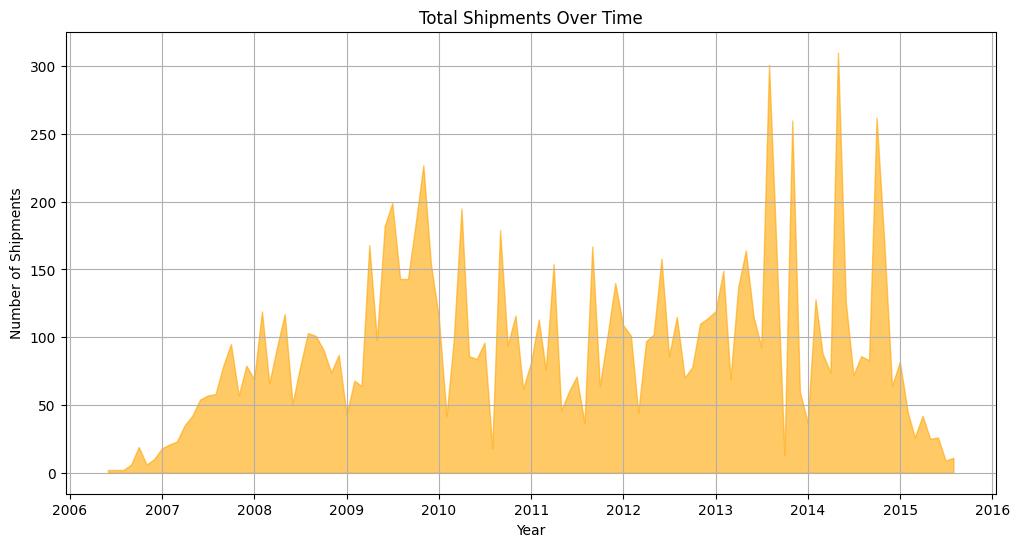

In [191]:
# Chart - 8 visualization code
# total shipment over time

df['PQ First Sent to Client Date'] = pd.to_datetime(df['PQ First Sent to Client Date'], errors='coerce')
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], errors='coerce')

# here i filled the missing dates with Scheduled Delivery Date and  in next line of code i drop rows where Shipment_Date is still NaT.
df['Shipment_Date'] = df['PQ First Sent to Client Date'].fillna(df['Scheduled Delivery Date'])
df = df.dropna(subset=['Shipment_Date'])
shipments = df.set_index('Shipment_Date').resample('M').size()
plt.figure(figsize=(12, 6))
plt.fill_between(shipments.index, shipments.values, color='orange', alpha=0.6)
plt.title("Total Shipments Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Shipments")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Line charts best display time trends and seasonality.

##### 2. What is/are the insight(s) found from the chart?

Shipment activity peaks mid-2014, declines post-2015.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifies seasonal demand surges for planning.
Decline afterward signals reduced demand or contract completion — must investigate cause.

#### Chart - 9

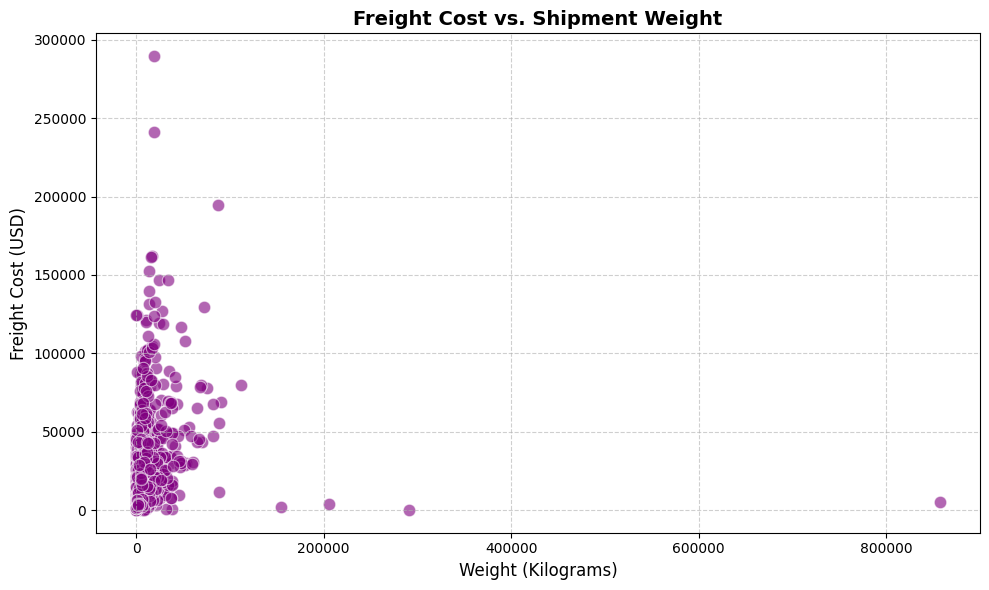

In [193]:
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'].astype(str).str.replace(',', '').str.strip(), errors='coerce')
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'].astype(str).str.replace(',', '').str.strip(), errors='coerce')

# Drop rows with missing or invalid data
df_clean = df.dropna(subset=['Weight (Kilograms)', 'Freight Cost (USD)'])

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Weight (Kilograms)',
    y='Freight Cost (USD)',
    data=df_clean,
    s=80,
    alpha=0.6,
    color='purple'
)

plt.title('Freight Cost vs. Shipment Weight', fontsize=14, fontweight='bold')
plt.xlabel('Weight (Kilograms)', fontsize=12)
plt.ylabel('Freight Cost (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plots show correlations between continuous variables.

##### 2. What is/are the insight(s) found from the chart?

Weak positive relationship — heavier shipments cost more, but not strictly proportional.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Indicates controlled pricing models for light/medium shipments.
Non-linear relationship may reveal inefficiencies or pricing inconsistencies.

#### Chart - 10

C:\Users\ojadh\AppData\Local\Temp\ipykernel_19168\1061253241.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Shipment Mode', y='Line Item Value', data=df_clean, palette='coolwarm', showfliers=False)


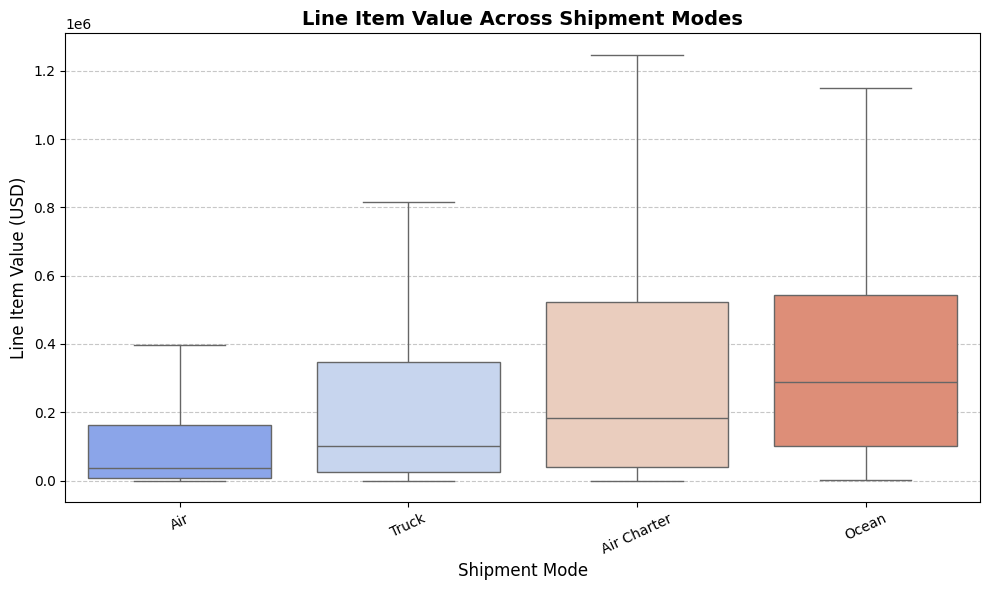

In [195]:
# Chart - 10 visualization code
# Line Item Value Across Shipment Modes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Shipment Mode', y='Line Item Value', data=df_clean, palette='coolwarm', showfliers=False)

plt.title('Line Item Value Across Shipment Modes', fontsize=14, fontweight='bold')
plt.xlabel('Shipment Mode', fontsize=12)
plt.ylabel('Line Item Value (USD)', fontsize=12)
plt.xticks(rotation=25)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots effectively compare distributions and medians across modes.

##### 2. What is/are the insight(s) found from the chart?

Air Charter and Ocean handle high-value goods.

Air handles lower-value but urgent items.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Shows strong strategic mode usage — urgent vs. bulk differentiation.

Costly air usage for low-value items could reduce profit margins.

#### Chart - 11

C:\Users\ojadh\AppData\Local\Temp\ipykernel_19168\2135781436.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Freight Cost (USD)', y='Country', palette='coolwarm')


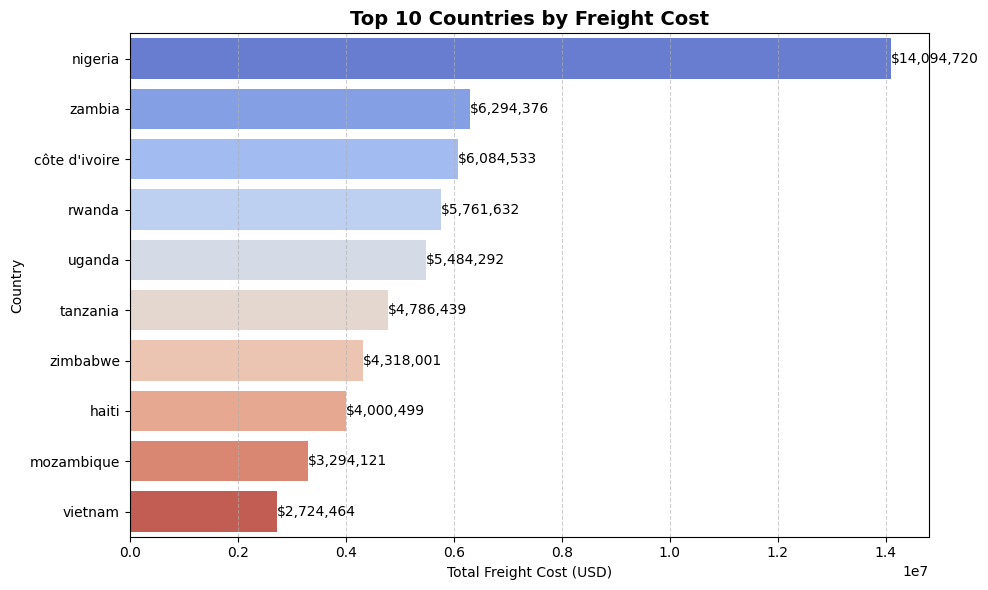

In [197]:
# Chart - 11 visualization code
# Top 10 Countries by Freight Cost
top_countries = ( data.groupby('Country', as_index=False)['Freight Cost (USD)'].sum().nlargest(10, 'Freight Cost (USD)'))

plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='Freight Cost (USD)', y='Country', palette='coolwarm')
plt.title('Top 10 Countries by Freight Cost', fontsize=14, fontweight='bold')
plt.xlabel('Total Freight Cost (USD)')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add values on bars
for index, value in enumerate(top_countries['Freight Cost (USD)']):
    plt.text(value + 100, index, f"${value:,.0f}", va='center')

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

Horizontal bar plots help compare numeric totals per country clearly.

##### 2. What is/are the insight(s) found from the chart?

Nigeria leads freight spend ($14M), followed by Zambia and Côte d’Ivoire.

High spend mirrors shipment volume.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Strong business in Nigeria shows customer concentration.
Freight cost exposure — logistics cost optimization needed for top countries.

#### Chart - 12

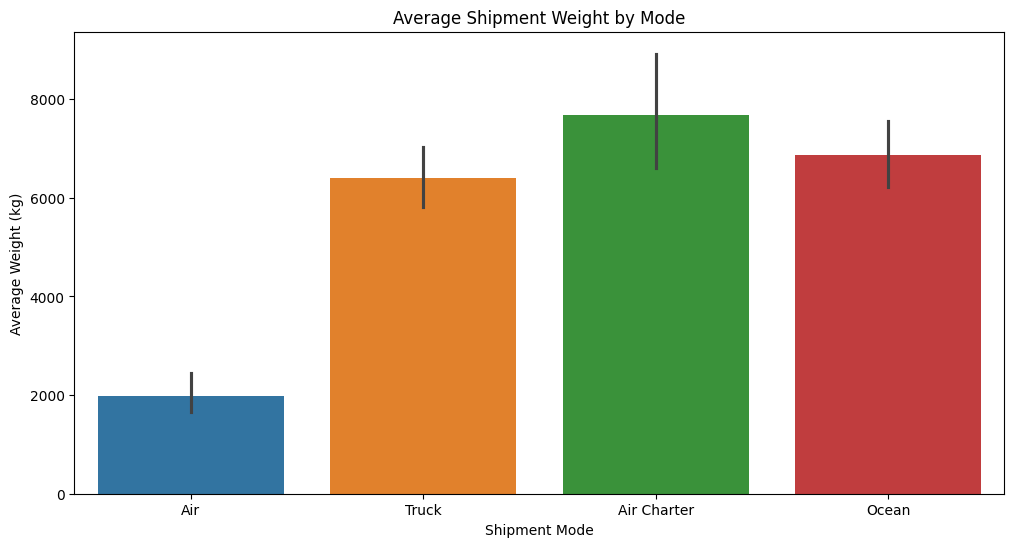

In [199]:
# Chart - 12 visualization code
# Avarage shipment weight by mode
plt.figure(figsize=(12, 6))
sns.barplot(x='Shipment Mode', y='Weight (Kilograms)', data=data, estimator='mean', hue='Shipment Mode', dodge=False)
plt.title('Average Shipment Weight by Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Average Weight (kg)')
plt.show()

##### 1. Why did you pick the specific chart?

Simple bar chart highlights average weights between modes.

##### 2. What is/are the insight(s) found from the chart?

Air Charter and Ocean carry heaviest loads; Air lightest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Modes are used strategically based on weight efficiency.
None major — reflects logical distribution planning.

#### Chart - 13

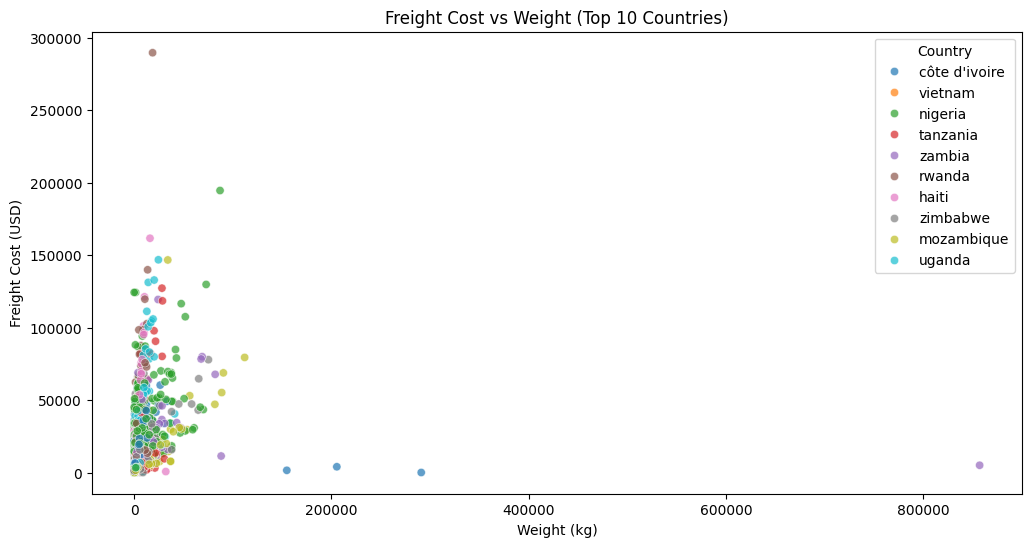

In [201]:
# Chart - 13 visualization code
# Freight Cost vs Weight (Top 10 Countries)
top_10_countries = data['Country'].value_counts().nlargest(10).index
top_10_data = data[data['Country'].isin(top_10_countries)]
plt.figure(figsize=(12, 6))
sns.scatterplot(y='Freight Cost (USD)',x='Weight (Kilograms)', hue='Country', data=top_10_data, alpha=0.7)
plt.title('Freight Cost vs Weight (Top 10 Countries)')
plt.xlabel('Weight (kg)')
plt.ylabel('Freight Cost (USD)')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots per country show localized correlation differences.

##### 2. What is/are the insight(s) found from the chart?

Strong cost-weight correlation in Uganda (0.69) and Vietnam (0.68).

Moderate correlation in Nigeria (0.55).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Predictable cost scaling enables better budget forecasting.

Weak correlation in some regions may mean inconsistent pricing or routing inefficiencies.

#### Chart - 14 - Correlation Heatmap

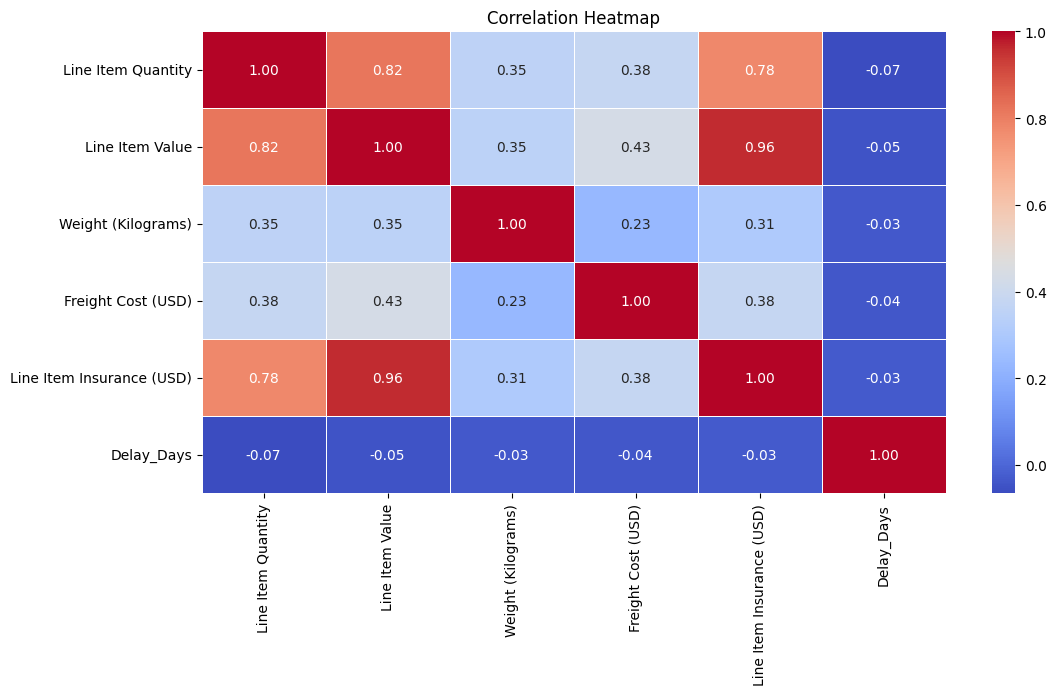

In [203]:
# heatmap
numeric_columns = data.select_dtypes(include=['number']).columns
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

To summarize all numeric relationships visually.

##### 2. What is/are the insight(s) found from the chart?

Line Item Value ↔ Insurance (0.96): near-perfect link.

Freight Cost moderately linked to Weight (0.23) and Value (0.43).

Delay independent of other metrics.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ensures pricing and insurance align logically.

Weak cost-weight link suggests pricing could be refined for consistency.

#### Chart - 15 - Pair Plot

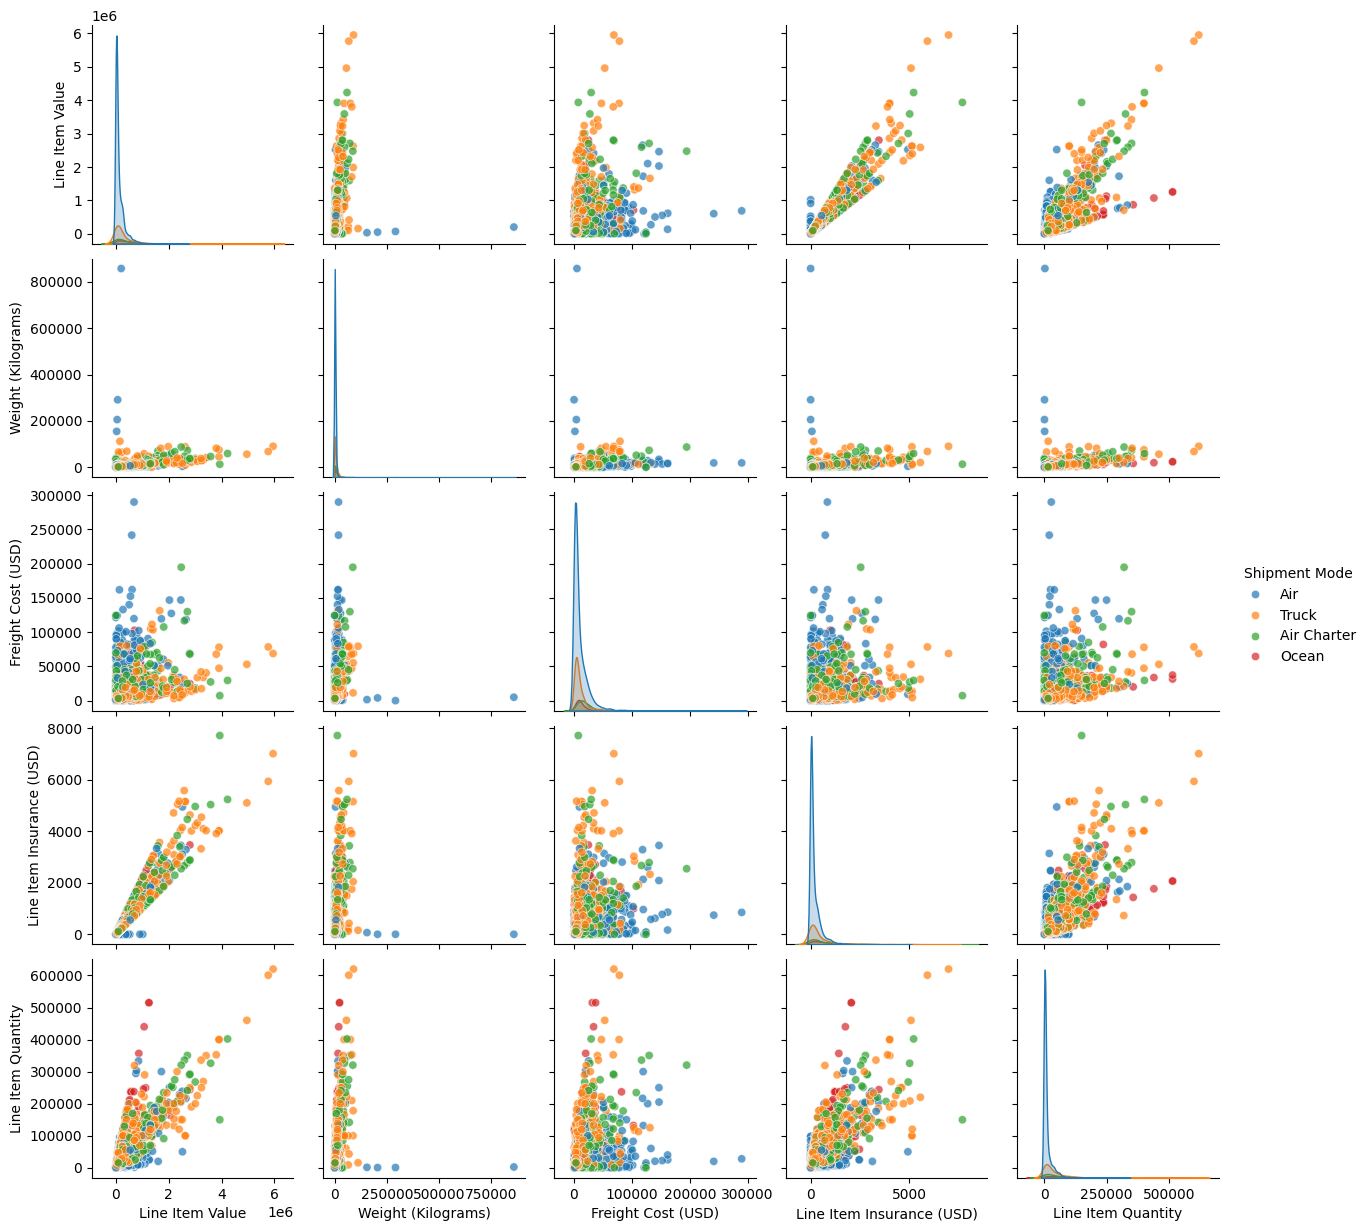

In [207]:
# Pair Plot visualization code
df_pairplot = data[['Line Item Value', 'Weight (Kilograms)', 'Freight Cost (USD)',
                      'Line Item Insurance (USD)', 'Line Item Quantity', 'Shipment Mode']].dropna()
sns.pairplot(df_pairplot, hue='Shipment Mode', diag_kind='kde', plot_kws={'alpha': 0.7})
plt.show()

# **Conclusion**

The analysis shows that Air shipments dominate FedEx’s operations, ensuring fast delivery but at higher freight costs. Nigeria, Côte d’Ivoire, and Uganda handle the highest shipment volumes and costs, highlighting key regional markets. Heavier shipments generally lead to higher freight costs, though efficiency varies by mode. Air and Truck modes perform best in on-time delivery, while Ocean freight faces delays.

Overall, FedEx’s logistics are efficient but can be optimized by reducing overuse of air freight, managing vendor dependency, and addressing regional delivery delays to improve cost-effectiveness and customer satisfaction.